In [1]:
import pandas as pd
from baseline_modeling_functions import *

In [2]:
combined_df = pd.read_csv('../data/combined_df.csv', index_col=0)

In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2855212 entries, 0 to 2855211
Data columns (total 46 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ab_id           int64  
 1   b_count         int64  
 2   s_count         int64  
 3   b_score         int64  
 4   batter_id       int64  
 5   batter_side     float64
 6   code            object 
 7   g_id            int64  
 8   inning          int64  
 9   on1b            float64
 10  on2b            float64
 11  on3b            float64
 12  p_score         int64  
 13  pitch_type      object 
 14  pitcher_id      int64  
 15  pitcher_side    float64
 16  ptype           object 
 17  px              float64
 18  pz              float64
 19  top             float64
 20  target          int64  
 21  pitcher_ahead   float64
 22  pitcher_behind  float64
 23  CH              float64
 24  CU              float64
 25  EP              float64
 26  FA              float64
 27  FC              float64
 28  FF          

All of the functions used in this notebook are outlined in the baseline_modeling_functions.py files. 

The split_data function is used for splitting our dataset into training and testing data, as well as picking out specific pitchers if we choose to look at them. 

find_best_params function will find the best parameters for our two models using 3-fold cross validation. Only using three cross validations due to time constraints on such a large data set.

get_model_accuracies will tell us how accurate each of our tested models turn out to be.

get_model_stats will return a confusion matrix, as well as a classification report to see how well our models performed each time it's called.

In [4]:
get_model_accuracies(combined_df, 'pitch_type')

,combined_df
Logistic Regression Training Scores,0.556565
Logistic Regression Testing Scores,0.556146
Ridge Classifier Training Scores,0.555960
Ridge Classifier Testing Scores,0.555608


Both models come in with an accuracy of around 56%. That's not great. However just accuracy alone doesn't give us the whole picture. Confusion matrices and classification reports will give us more information.

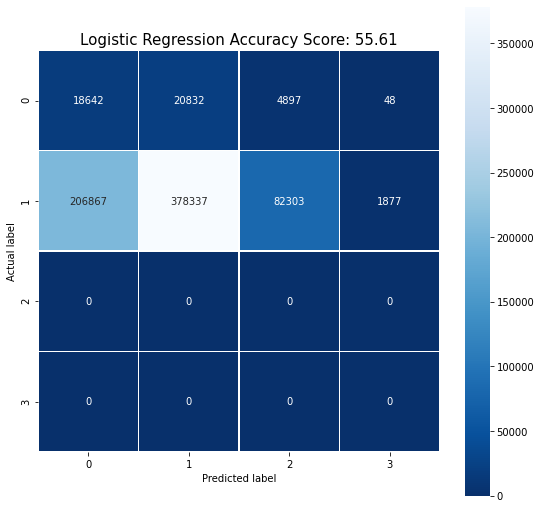

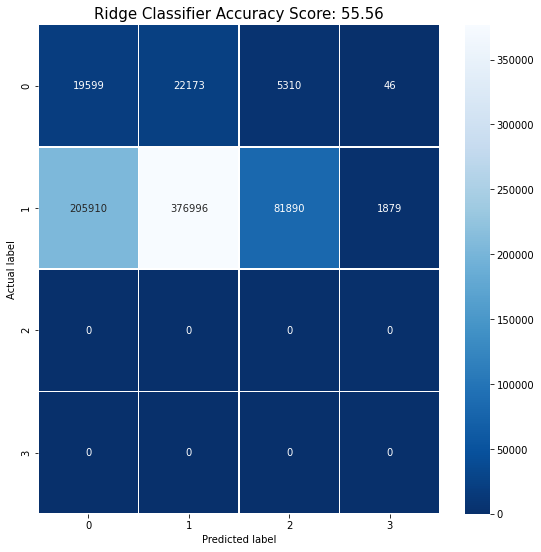

Logistic Regression Classification Report
              precision    recall  f1-score   support

          BB       0.42      0.08      0.14    225509
          FB       0.57      0.95      0.71    399169
          OS       0.00      0.00      0.00     87200
          OT       0.00      0.00      0.00      1925

    accuracy                           0.56    713803
   macro avg       0.25      0.26      0.21    713803
weighted avg       0.45      0.56      0.44    713803

Ridge Classifier Classification Report
              precision    recall  f1-score   support

          BB       0.42      0.09      0.14    225509
          FB       0.57      0.94      0.71    399169
          OS       0.00      0.00      0.00     87200
          OT       0.00      0.00      0.00      1925

    accuracy                           0.56    713803
   macro avg       0.25      0.26      0.21    713803
weighted avg       0.45      0.56      0.44    713803



In [5]:
get_model_stats(combined_df, 'pitch_type')

Neither model even guessed offspeed pitches or other pitches for the entire data set. But got 95% of fastballs and only 8%-9% of breaking balls with bad precisions for both of them. This could be because of the huge class imbalance in the data set, with offspeed pitches only being about 12% of the entire dataset, and other pitches being less than 1%. Whereas fastball take up the majority of the data set. Overall these results make sense, as the majority of the time pitchers are throwing fastballs, so the model could just predict a pitch is going to be a fastball and it's a likely bet that that's what actually happened.

That was for the entire data set, now let's take a look at individual pitchers, looking at my favorite pitcher first, Felix Hernandez.

In [6]:
get_model_accuracies(combined_df, 'pitch_type', first_name='Felix', last_name='Hernandez')

,combined_df
Logistic Regression Training Scores,0.464417
Logistic Regression Testing Scores,0.468022
Ridge Classifier Training Scores,0.464982
Ridge Classifier Testing Scores,0.465904


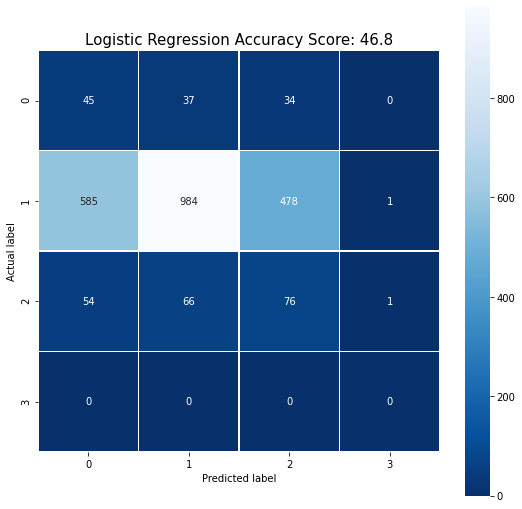

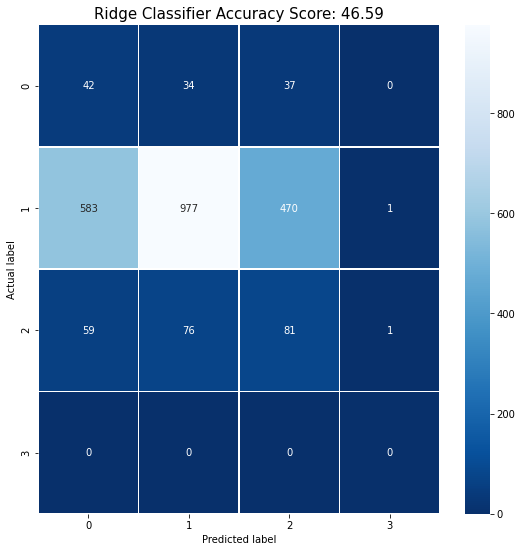

Logistic Regression Classification Report
              precision    recall  f1-score   support

          BB       0.39      0.07      0.11       684
          FB       0.48      0.91      0.63      1087
          OS       0.39      0.13      0.19       588
          OT       0.00      0.00      0.00         2

    accuracy                           0.47      2361
   macro avg       0.31      0.28      0.23      2361
weighted avg       0.43      0.47      0.37      2361

Ridge Classifier Classification Report
              precision    recall  f1-score   support

          BB       0.37      0.06      0.11       684
          FB       0.48      0.90      0.63      1087
          OS       0.37      0.14      0.20       588
          OT       0.00      0.00      0.00         2

    accuracy                           0.47      2361
   macro avg       0.31      0.27      0.23      2361
weighted avg       0.42      0.47      0.37      2361



In [7]:
get_model_stats(combined_df, 'pitch_type', first_name='Felix', last_name='Hernandez')

Here we see a much smaller data set, only 2,362 pitches predicted instead of 714,000. However, even with this fact, and that the model seemed to be able to predict offspeed pitches correctly this time around, it still had a worse overall time than the entire data set. Felix Hernandez hasn't been on the top of his game from 2015-2019, though not the worst pitcher, it still seems like he's not very predictable in the eyes of machine learning. 

In [8]:
get_model_accuracies(combined_df, 'pitch_type', first_name='Justin', last_name='Verlander')

,combined_df
Logistic Regression Training Scores,0.600814
Logistic Regression Testing Scores,0.602568
Ridge Classifier Training Scores,0.600606
Ridge Classifier Testing Scores,0.601629


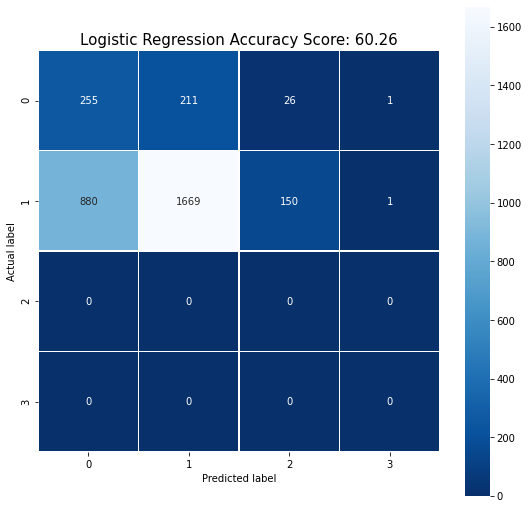

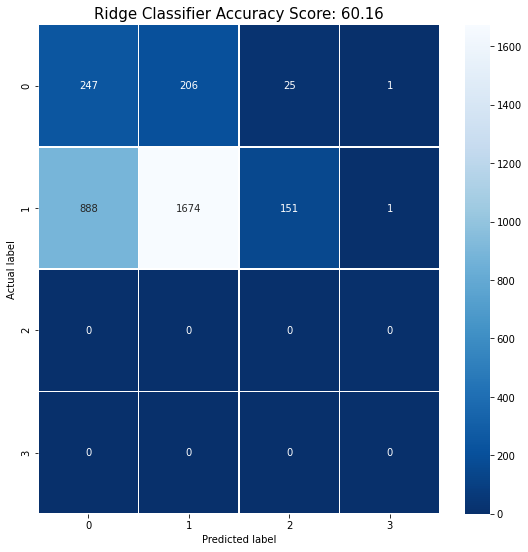

Logistic Regression Classification Report
              precision    recall  f1-score   support

          BB       0.52      0.22      0.31      1135
          FB       0.62      0.89      0.73      1880
          OS       0.00      0.00      0.00       176
          OT       0.00      0.00      0.00         2

    accuracy                           0.60      3193
   macro avg       0.28      0.28      0.26      3193
weighted avg       0.55      0.60      0.54      3193

Ridge Classifier Classification Report
              precision    recall  f1-score   support

          BB       0.52      0.22      0.31      1135
          FB       0.62      0.89      0.73      1880
          OS       0.00      0.00      0.00       176
          OT       0.00      0.00      0.00         2

    accuracy                           0.60      3193
   macro avg       0.28      0.28      0.26      3193
weighted avg       0.55      0.60      0.54      3193



In [9]:
get_model_stats(combined_df, 'pitch_type', first_name='Justin', last_name='Verlander')

I went in to this project thinking that better pitchers would be less predictable than those not as good, and we have an example of the opposite right here. Felix Hernandez, being an objectively worse pitcher than Justin Verlander, was less predictable than Verlander. However, it must be noted that Verlander's class representation is different than Hernandez's. Verlander here throws mostly 2 pitches, whereas Felix had a good mix of 3 pitches. I think that led to Verlander being more predictable in the eyes of the model than Hernandez was.  

Let's take a look at another pitcher who's also been excellent from 2015 to 2018, Clayton Kershaw

In [10]:
get_model_accuracies(combined_df, 'pitch_type', first_name='Clayton', last_name='Kershaw')

,combined_df
Logistic Regression Training Scores,0.631456
Logistic Regression Testing Scores,0.608797
Ridge Classifier Training Scores,0.630288
Ridge Classifier Testing Scores,0.609576


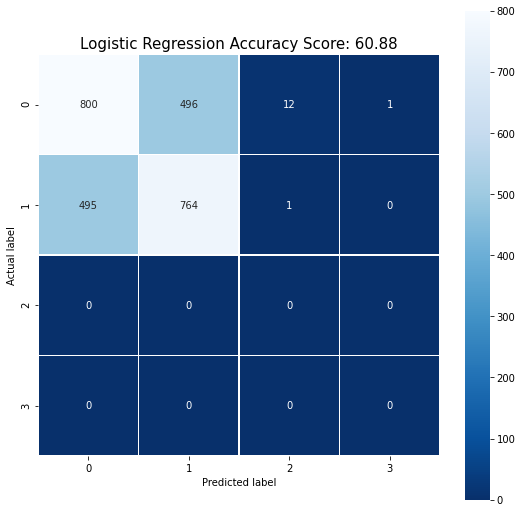

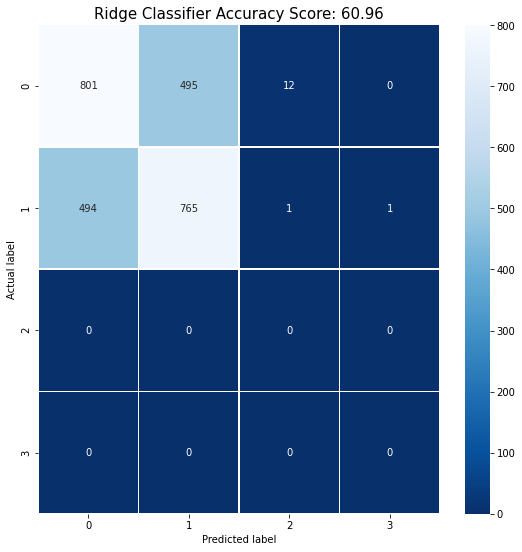

Logistic Regression Classification Report
              precision    recall  f1-score   support

          BB       0.61      0.62      0.61      1295
          FB       0.61      0.61      0.61      1260
          OS       0.00      0.00      0.00        13
          OT       0.00      0.00      0.00         1

    accuracy                           0.61      2569
   macro avg       0.30      0.31      0.31      2569
weighted avg       0.61      0.61      0.61      2569

Ridge Classifier Classification Report
              precision    recall  f1-score   support

          BB       0.61      0.62      0.62      1295
          FB       0.61      0.61      0.61      1260
          OS       0.00      0.00      0.00        13
          OT       0.00      0.00      0.00         1

    accuracy                           0.61      2569
   macro avg       0.30      0.31      0.31      2569
weighted avg       0.61      0.61      0.61      2569



In [11]:
get_model_stats(combined_df, 'pitch_type', first_name='Clayton', last_name='Kershaw')

About the same as Verlander. An excellent pitcher who's stayed consistently good from 2015-2018 being less predictable with only 62% predictability on both models. It seems to be about the same story as Verlander too, with Kershaw throwing an about even number of fastballs and breaking balls, it makes sense the accuracies of the models would be similar, or basically the same.

So we've taken a look at 2 of the top pitchers in the MLB, and one who hasn't been great over the last 4 years, and it seems like the better pitchers have so far been less predictable. Let's take a look at two other pitchers who haven't been as good as Verlander or Kershaw over these 4 seasons, as well as aren't starting pitchers who are instead relievers and closers.

First up is New York Mets closer Edwin Diaz. He's a good young closer who's been pitching in the MLB since 2016, and winning the AL Reliever of the Year award in 2018 when he was with Seattle. 

In [12]:
get_model_accuracies(combined_df, 'pitch_type', first_name='Edwin', last_name='Diaz')

,combined_df
Logistic Regression Training Scores,0.680626
Logistic Regression Testing Scores,0.685279
Ridge Classifier Training Scores,0.681049
Ridge Classifier Testing Scores,0.677665


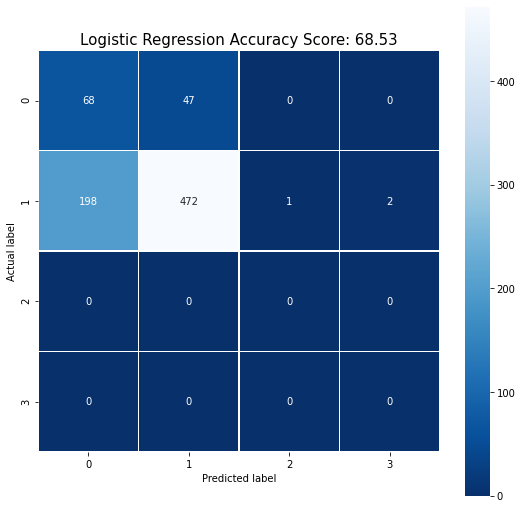

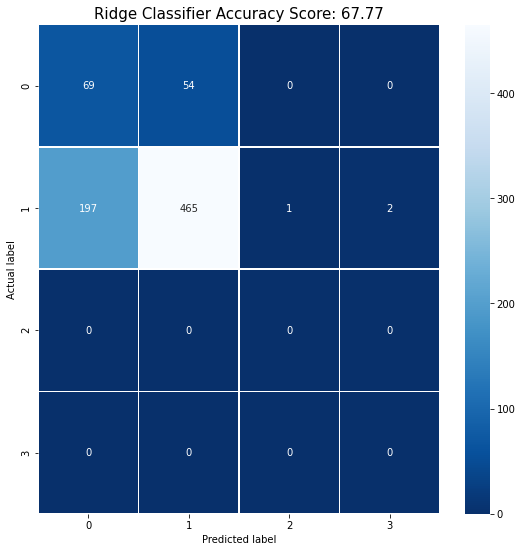

Logistic Regression Classification Report
              precision    recall  f1-score   support

          BB       0.59      0.26      0.36       266
          FB       0.70      0.91      0.79       519
          OS       0.00      0.00      0.00         1
          OT       0.00      0.00      0.00         2

    accuracy                           0.69       788
   macro avg       0.32      0.29      0.29       788
weighted avg       0.66      0.69      0.64       788

Ridge Classifier Classification Report
              precision    recall  f1-score   support

          BB       0.56      0.26      0.35       266
          FB       0.70      0.90      0.79       519
          OS       0.00      0.00      0.00         1
          OT       0.00      0.00      0.00         2

    accuracy                           0.68       788
   macro avg       0.32      0.29      0.29       788
weighted avg       0.65      0.68      0.64       788



In [13]:
get_model_stats(combined_df, 'pitch_type', first_name='Edwin', last_name='Diaz')

Similar story to the two pitchers that came before him, only throws fastballs and breaking balls and the model has an easier time predicting 2 classes than 3. It seems like as the sample size gets smaller and pitchers are only throwing 2 types of pitches, the models will generally be more accurate.

How about Aroldis Chapman? He's been one of the best closers in baseball for a long time, let's see how predictable he's been since 2015.

In [14]:
get_model_accuracies(combined_df, 'pitch_type', first_name='Aroldis', last_name='Chapman')

,combined_df
Logistic Regression Training Scores,0.768446
Logistic Regression Testing Scores,0.768603
Ridge Classifier Training Scores,0.768446
Ridge Classifier Testing Scores,0.768603


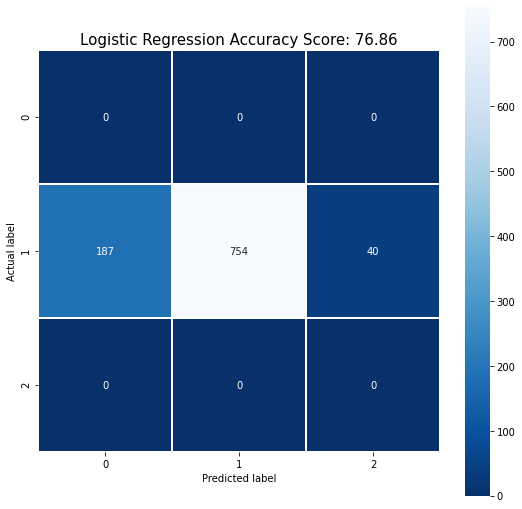

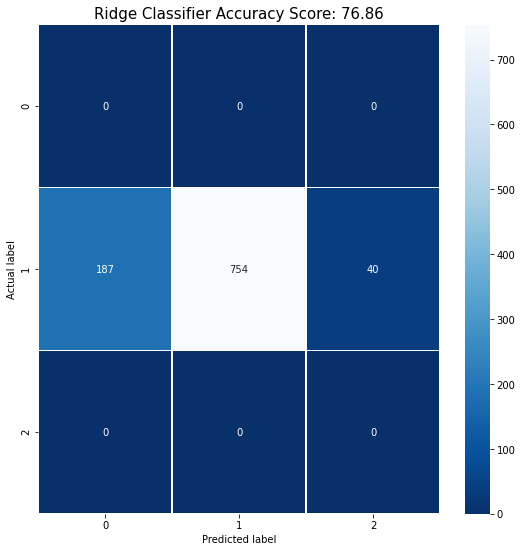

Logistic Regression Classification Report
              precision    recall  f1-score   support

          BB       0.00      0.00      0.00       187
          FB       0.77      1.00      0.87       754
          OS       0.00      0.00      0.00        40

    accuracy                           0.77       981
   macro avg       0.26      0.33      0.29       981
weighted avg       0.59      0.77      0.67       981

Ridge Classifier Classification Report
              precision    recall  f1-score   support

          BB       0.00      0.00      0.00       187
          FB       0.77      1.00      0.87       754
          OS       0.00      0.00      0.00        40

    accuracy                           0.77       981
   macro avg       0.26      0.33      0.29       981
weighted avg       0.59      0.77      0.67       981



In [15]:
get_model_stats(combined_df, 'pitch_type', first_name='Aroldis', last_name='Chapman')

Here we have an example of a pitcher who basically only throws fastballs. Aroldis Chapman throughout his time in the MLB has had one of the biggest arms in the game. Consistently throwing 100+ mph fastballs, which even for professional hitters are almost impossible to hit, so why not keep throwing them? Apparently the model on Chapman just predicted all fastballs, since that was the vast majority of the pitches thrown by him, and called it good enough. 

## Final thoughts

There seems to be a bit of a correlation to how many pitches a pitcher throws on a regular basis and how predictable they are. Looking at Felix Hernandez, he pretty consistently throws three types of pitches, and he was predicted at a 46% accuracy, with most of his fastballs being correctly guessed, but the majority of his breaking balls and offspeed pitches being incorrectly guessed. Compared to Clayton Kershaw and Justin Verlander, who usually throw two types of pitches, the model predicted their pitches at 62% and 60% accuracy respectively. It seems to be broken up across pitcher positions as well (starters vs. relievers). Hernandez, Verlander, and Kershaw are all starting pitchers, but looking at the two relievers we did, Diaz and Chapman, there was a disparity on accuracies. Diaz and Chapman were predicted with a higher accuracy than those of the starters, about 68% and 77% respectively. This could be due to the sample size, closers and relievers don't throw nearly as many pitches as starters, especially the better ones like Kershaw and Verlander. More analysis will be done to see a more clear trend on better pitchers vs. worse pitchers and see if relievers are really this predictable.